In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score,balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
df=pd.read_csv('/content/drive/MyDrive/clust_imputed_data.csv')
df=df.iloc[:,1:]
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,122,0.003883,0.00000,0.001,0.000,0.0,0.0,22,2.2,0.000000,...,152.0,1.0,0.0,131.0,133.0,134.0,5.0,0,2,1
1,135,0.000000,0.00000,0.007,0.001,0.0,0.0,54,0.5,12.000000,...,149.0,2.0,0.0,140.0,137.0,140.0,2.0,1,1,1
2,125,0.000000,0.00083,0.000,0.000,0.0,0.0,68,0.3,0.841667,...,128.0,0.0,0.0,125.0,125.0,126.0,0.0,0,9,3
3,138,0.013000,0.00000,0.007,0.001,0.0,0.0,51,1.2,0.000000,...,171.0,7.0,0.0,148.0,147.0,149.0,12.0,1,2,1
4,138,0.000000,0.00000,0.005,0.000,0.0,0.0,65,0.4,14.000000,...,149.0,3.0,0.0,141.0,140.0,142.0,1.0,0,10,2


# Η πρώτη ανάλυση έγινε στο kmean_clustering_PCA_with_outliers οπότε κάποια notes σε αυτό το notebook έχουν αφεθεί.Επιπλέον  φαίνεται πως η διόρθωση των outliers έριξε την απόδοση του αλγορίθμου εδώ πέρα

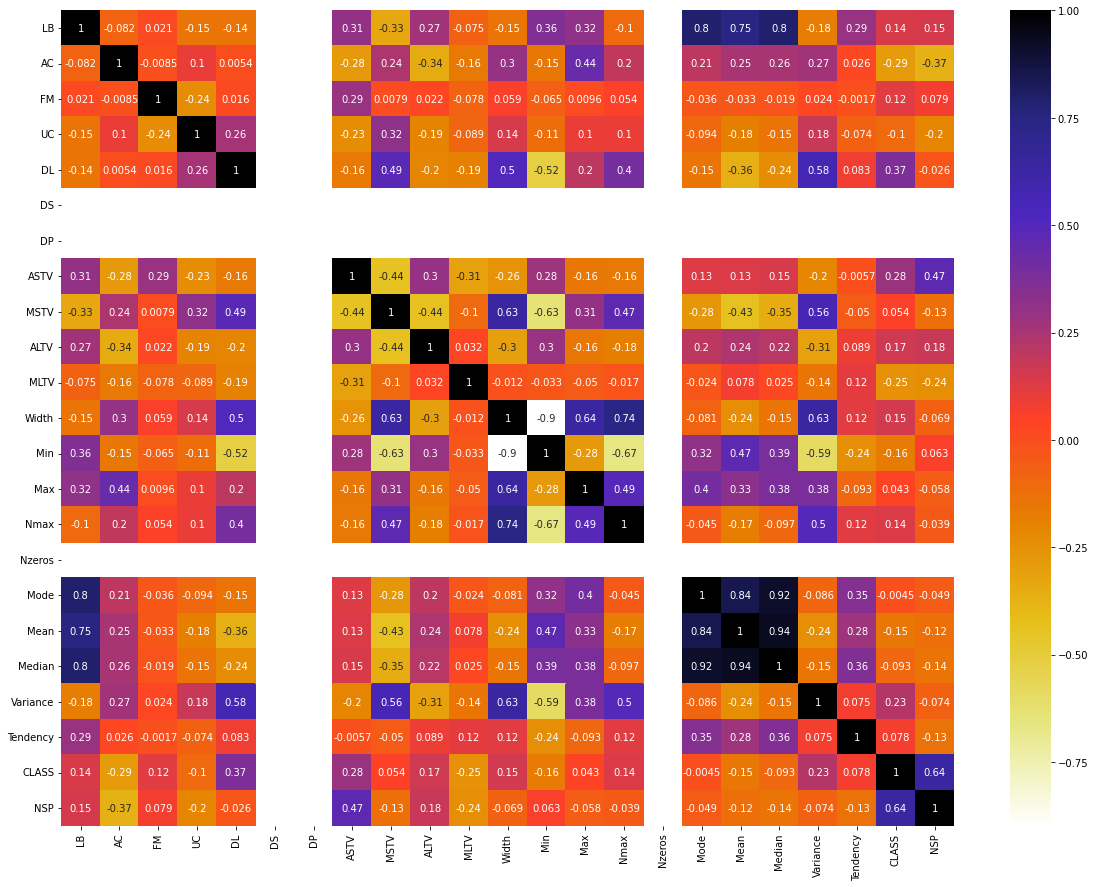

In [3]:
cor = df.corr()        #3 features δεν έχουν πλέον διασπορα(πληροφορία) αποτέλεσμα του noise reduction 
plt.figure(figsize=(20,15))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

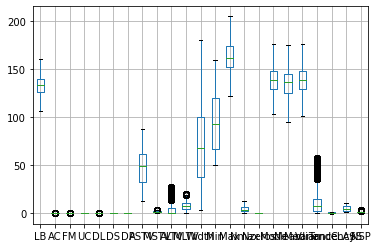

In [4]:
df.boxplot()
plt.show()

In [5]:
df.std()

LB           9.840844
AC           0.003703
FM           0.001455
UC           0.002937
DL           0.001963
DS           0.000000
DP           0.000000
ASTV        17.192814
MSTV         0.687345
ALTV         6.078505
MLTV         4.488145
Width       38.955693
Min         29.560212
Max         16.734263
Nmax         2.793380
Nzeros       0.000000
Mode        12.978122
Mean        13.988287
Median      13.497772
Variance    12.978186
Tendency     0.610829
CLASS        3.026883
NSP          0.614377
dtype: float64

In [6]:
X=df.iloc[:,:21]  
Y=df.iloc[:,22]
pca=PCA()    #Καθώς έχουμε μη επιβλεπόμενη συσταδοποίηση δε μπορούμε να ξέρουμε ποιές μεταβλητές είναι πιο σημαντικές όπως στην κατηγοροιοποίηση όπου είχαμε σαν κριτήριο την συσχέτιση.Επομένως κύριο κριτήριο είναι μεταβλητές με μεγάλη διασπορά.
scaler=StandardScaler() #Οπότε μπορούμε είτε να επιλέξουμε μεταβλητές με μεγάλη διασπορά αλλά να είναι μεν μεταξύ τους ασυσχέτιστες ή να κάνουμe PCA και να πάρουμε τις πρώτες συνιστώσες όπου θα έχουνε μεγαλύτερη διασπορά από τις τελευταίες.
X=scaler.fit_transform(X) 
X=pca.fit_transform(X)
np.round(pca.explained_variance_ratio_,4)

array([0.2995, 0.2007, 0.0915, 0.0778, 0.0659, 0.0526, 0.0402, 0.0353,
       0.0327, 0.0263, 0.0204, 0.0183, 0.0141, 0.0082, 0.0073, 0.0061,
       0.0022, 0.0007, 0.    , 0.    , 0.    ])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f358433deb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f358434f5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f358433db50>,
 'medians': [<matplotlib.lines.Line2D at 0x7f358434fc70>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f358434ff40>,
 'means': []}

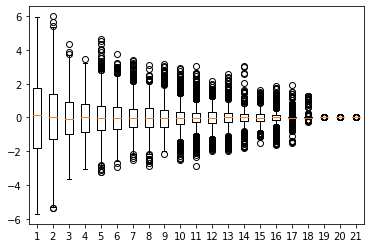

In [7]:
X=np.array(X)     #Βλέπουμε πως οι πρώτες 2 μεταβλητές διατηρούν το 28%+15%=45% της αρχικής μεταβλητότητας και με αυτέ θα κάνουμε τα δισδιάστα plots ενώ με τις πρώτες τρεις (περίπου 53% μεταβλητότητας) τα τρισδιάστατα plots.
plt.boxplot(X)

Plot of  0 and 0


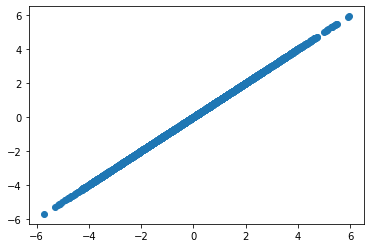

Plot of  0 and 1


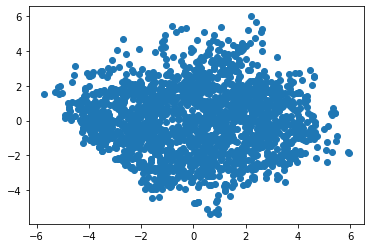

Plot of  0 and 2


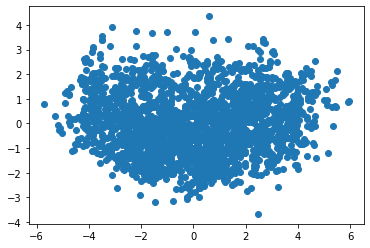

Plot of  1 and 0


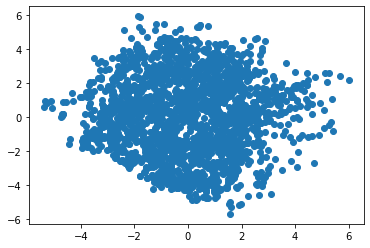

Plot of  1 and 1


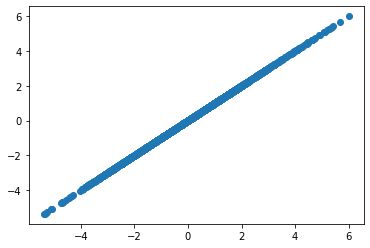

Plot of  1 and 2


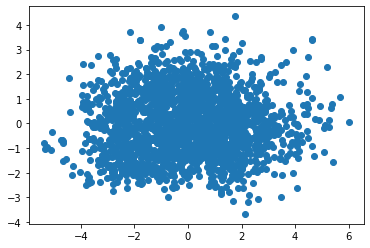

Plot of  2 and 0


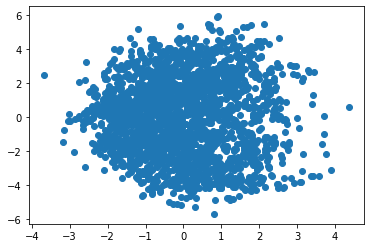

Plot of  2 and 1


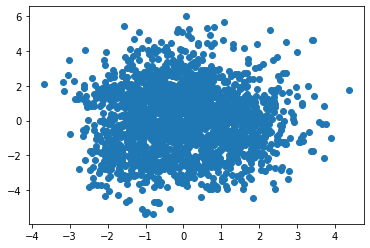

Plot of  2 and 2


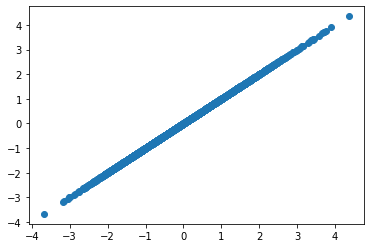

In [8]:
for i in range(0,3):
  for j in range(0,3):
    print('Plot of ',i,'and',j)
    plt.scatter(X[:,i], X[:,j])
    plt.show()

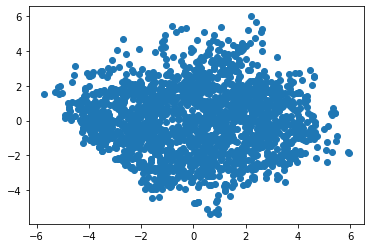

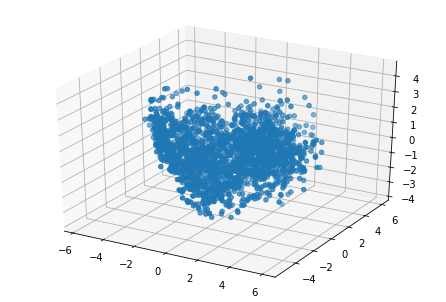

In [9]:
plt.scatter(X[:,0], X[:,1])    #Βλέπουμε πως το pattern είναι αρκετά πυκνό επομένως density based algorithms δε θα είναι αποδοτικοί.Θα κάνουμε συστατοδοποίηση με έναν distance based algorithm(K-means) και έναν βασισμένο σε πιθανοφάνειες(Gaussian Mixture Model)
plt.show()                
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter( X[:,0], X[:,1],X[:,2])
fig.show()

# K-means -Δεν θα κάνουμε scaling πριν το k-means αφού έχουμε κάνει  PCA και η  απόστασταση στην πρώτη συνιστώσα είναι σημαντικότερη από την 2η κ.ο.κ. Διαφορετικά βγαίνουν πολύ κακά αποτελέσματα

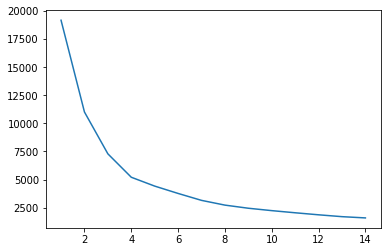

In [10]:
# Elbow-Chart     
wcss=[]
for i in range(1,15):
  km=KMeans(n_clusters=i)
  km.fit(X[:,[0,1]])
  wcss.append(km.inertia_)

plt.plot(range(1,15),wcss)
plt.show()     #το elbow chart προτείνει 4 clusters ωστόσο θα επιλέξουμε κάτι κοντινό στις κατηγορηματικές που έχουμε οπότε θα επιδιώξουμε 3 συστάδες

Silhouetter Score: 0.172


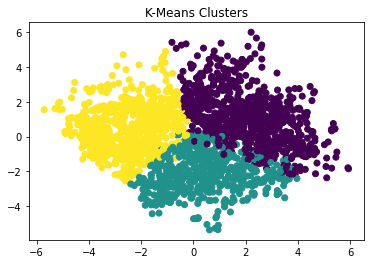

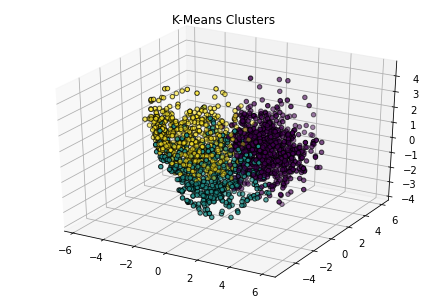

In [17]:
# Kmeans cluster  χαμηλό silhouete score ωστόσο δεδομένου του συνωστισμού μεταξύ των σημείων στα αρχικά πλοτς ήταν αναμενόμενο καθώς το silhouete score λαμβάνει υπόψιν και την απόσταση των σημείων από το γειτονικά clusters και βλέπουμε πως είναι αρκετα συνωστισμένα.Ας δούμε πως πήγε με το confusion matrix
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)

kmeans=cluster.fit(X)

score=silhouette_score(X,kmeans.labels_,metric='euclidean')
print('Silhouetter Score: %.3f'%score)

plt.scatter(X[:, 0], X[:, 1],c=kmeans.labels_)
plt.title("K-Means Clusters")

fig = plt.figure() 
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans.labels_, edgecolor='k')  #Επιπλέον ενλω θα θέλαμε συστάδες διαχωρισμένες κυρίως ως προν τον άξονα Χ για να είναι περισσότερο όμοι με το πλοτ με labels την μεταβλητή στόχο βλέπουμε πως σε αυτό το dataset δεν επιτυγχάνεται αυτό
plt.title("K-Means Clusters")
fig.show()

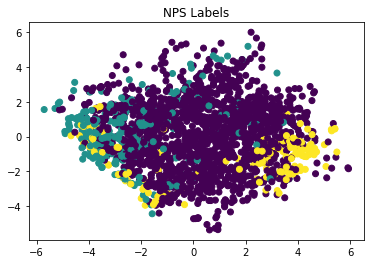

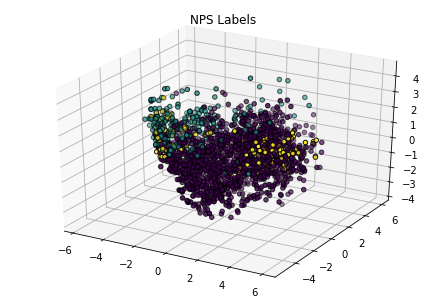

In [15]:
plt.scatter(X[:,0], X[:,1],c=Y)    #Για να δούμε τα πλοτς με labels την πραγματική τιμή στόχου της NSP
plt.title("NPS Labels")
plt.show()                #Βλέπουμε στο δισδιάστατο πλοτ πως η μία κλάση είναι κυρίως αριστερά η άλλη εκτείνεται στο μεγαλύτερο μέρος του κέντρου ενώ η τρίτη απλώνεται κυρίως δεξιά ενώ έχει αρκετά σημεία αριστερά,δηλαδή ο άξονας χ που αποτελείται από την πρώτη συνιστώσα('0') φαίνεται να παίζει το μεγαλύτερο ρόλο στην συσταδοποίηση


fig = plt.figure()        
ax = Axes3D(fig)
ax.scatter( X[:,0], X[:,1],X[:,2],c=Y, edgecolor='k')
plt.title("NPS Labels")
fig.show()

In [18]:
np.unique(Y, return_counts=True)

(array([1, 2, 3]), array([1655,  295,  176]))

In [19]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)
kmeans=cluster.fit(X)
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([815, 558, 753]))

In [20]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)  #Με όλες τισ συνιστώσες πετύχαμε γενική ακρίβεια 65,4% και ισορροπημένη ακρίβεια 69.2%.Θα δούμε τώρα αν μπορούμε να θυσιάσουμε λίγη ακρίβεια ώστε να μειώσουμε το πλήθος των features για λιγότερους υπολογισμούς(με κέρδος ταχύτητα)
kmeans=cluster.fit(X)

kmeans.labels_[np.where(kmeans.labels_==0)]=4  #1
kmeans.labels_[np.where(kmeans.labels_==2)]=5  #2
kmeans.labels_[np.where(kmeans.labels_==1)]=6  #3

kmeans.labels_[np.where(kmeans.labels_==4)]=1
kmeans.labels_[np.where(kmeans.labels_==5)]=2
kmeans.labels_[np.where(kmeans.labels_==6)]=3
labels=kmeans.labels_
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))



Prediction accuracy for the testing dataset is:  46.2 %
Prediction balanced accuracy for the testing dataset is:  49.4 %
--------------- Confusion Matrix ---------------
[[696 461 498]
 [ 29 246  20]
 [ 90  46  40]]


In [37]:
Z=X[:,0:15]


Silhouetter Score: 0.172


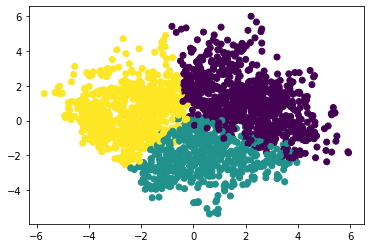

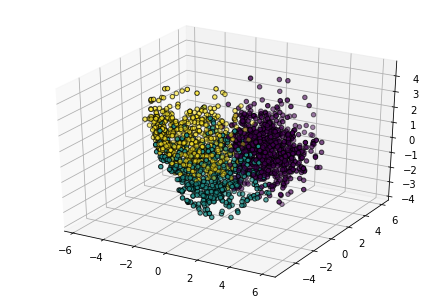

In [38]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)

kmeans=cluster.fit(Z)

score=silhouette_score(X,kmeans.labels_,metric='euclidean')
print('Silhouetter Score: %.3f'%score)

plt.scatter(Z[:, 0], Z[:, 1],c=kmeans.labels_)
fig = plt.figure() 
ax = Axes3D(fig)
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=kmeans.labels_, edgecolor='k')
fig.show()

In [39]:
np.unique(Y, return_counts=True)

(array([1, 2, 3]), array([1655,  295,  176]))

In [40]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)
kmeans=cluster.fit(Z)
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([817, 555, 754]))

In [41]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)    #Ίδια ακρίβεια με λιγότερες συνιστώσες
kmeans=cluster.fit(Z)

kmeans.labels_[np.where(kmeans.labels_==0)]=4  #1
kmeans.labels_[np.where(kmeans.labels_==1)]=5  #2
kmeans.labels_[np.where(kmeans.labels_==2)]=6  #3

kmeans.labels_[np.where(kmeans.labels_==4)]=1
kmeans.labels_[np.where(kmeans.labels_==5)]=2
kmeans.labels_[np.where(kmeans.labels_==6)]=3
labels=kmeans.labels_
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))

Prediction accuracy for the testing dataset is:  35.9 %
Prediction balanced accuracy for the testing dataset is:  24.9 %
--------------- Confusion Matrix ---------------
[[698 496 461]
 [ 29  19 247]
 [ 90  40  46]]


In [42]:
Z=X[:,0:10]

Silhouetter Score: 0.172


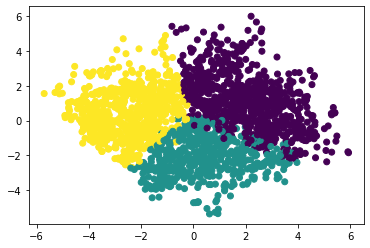

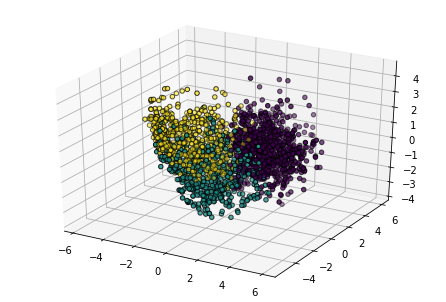

In [43]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)

kmeans=cluster.fit(Z)

score=silhouette_score(X,kmeans.labels_,metric='euclidean')
print('Silhouetter Score: %.3f'%score)

plt.scatter(Z[:, 0], Z[:, 1],c=kmeans.labels_)
fig = plt.figure() 
ax = Axes3D(fig)
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=kmeans.labels_, edgecolor='k')
fig.show()

In [44]:
np.unique(Y, return_counts=True)

(array([1, 2, 3]), array([1655,  295,  176]))

In [45]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)
kmeans=cluster.fit(Z)
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([815, 556, 755]))

In [46]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)    #Ίδια ακρίβεια με λιγότερες συνιστώσες
kmeans=cluster.fit(Z)

kmeans.labels_[np.where(kmeans.labels_==0)]=4  #1
kmeans.labels_[np.where(kmeans.labels_==1)]=5  #2
kmeans.labels_[np.where(kmeans.labels_==2)]=6  #3

kmeans.labels_[np.where(kmeans.labels_==4)]=1
kmeans.labels_[np.where(kmeans.labels_==5)]=2
kmeans.labels_[np.where(kmeans.labels_==6)]=3
labels=kmeans.labels_
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))

Prediction accuracy for the testing dataset is:  35.8 %
Prediction balanced accuracy for the testing dataset is:  24.9 %
--------------- Confusion Matrix ---------------
[[696 497 462]
 [ 29  19 247]
 [ 90  40  46]]


In [47]:
Z=X[:,0:8]

Silhouetter Score: 0.171


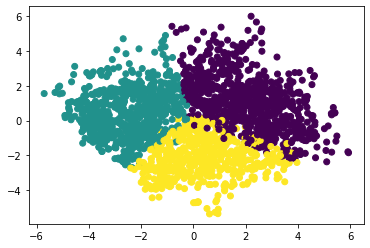

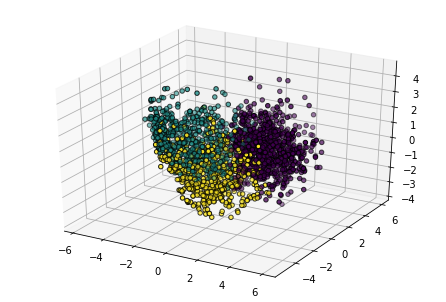

In [48]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)

kmeans=cluster.fit(Z)

score=silhouette_score(X,kmeans.labels_,metric='euclidean')
print('Silhouetter Score: %.3f'%score)

plt.scatter(Z[:, 0], Z[:, 1],c=kmeans.labels_)
fig = plt.figure() 
ax = Axes3D(fig)
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=kmeans.labels_, edgecolor='k')
fig.show()

In [49]:
np.unique(Y, return_counts=True)

(array([1, 2, 3]), array([1655,  295,  176]))

In [50]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)
kmeans=cluster.fit(Z)
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([819, 750, 557]))

In [51]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)    #Ίδια ακρίβεια με λιγότερες συνιστώσες
kmeans=cluster.fit(Z)

kmeans.labels_[np.where(kmeans.labels_==2)]=4  #1
kmeans.labels_[np.where(kmeans.labels_==1)]=5  #2  
kmeans.labels_[np.where(kmeans.labels_==0)]=6  #3

kmeans.labels_[np.where(kmeans.labels_==4)]=1
kmeans.labels_[np.where(kmeans.labels_==5)]=2
kmeans.labels_[np.where(kmeans.labels_==6)]=3
labels=kmeans.labels_
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))

Prediction accuracy for the testing dataset is:  39.2 %
Prediction balanced accuracy for the testing dataset is:  54.9 %
--------------- Confusion Matrix ---------------
[[497 458 700]
 [ 20 246  29]
 [ 40  46  90]]


In [52]:
Z=X[:,0:3]

Silhouetter Score: 0.175


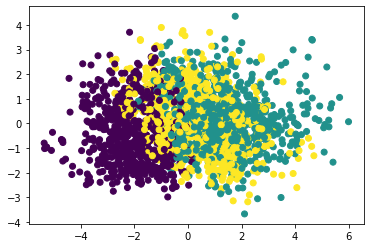

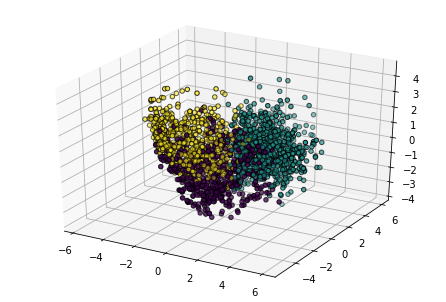

In [53]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)

kmeans=cluster.fit(Z)

score=silhouette_score(X,kmeans.labels_,metric='euclidean')
print('Silhouetter Score: %.3f'%score)

plt.scatter(Z[:, 1], Z[:, 2],c=kmeans.labels_)
fig = plt.figure() 
ax = Axes3D(fig)
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=kmeans.labels_, edgecolor='k')
fig.show()

In [54]:
np.unique(Y, return_counts=True)

(array([1, 2, 3]), array([1655,  295,  176]))

In [55]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)
kmeans=cluster.fit(Z)
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([602, 770, 754]))

In [56]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)    #Ίδια ακρίβεια με λιγότερες συνιστώσες
kmeans=cluster.fit(Z)

kmeans.labels_[np.where(kmeans.labels_==2)]=4  #1
kmeans.labels_[np.where(kmeans.labels_==0)]=5  #2  
kmeans.labels_[np.where(kmeans.labels_==1)]=6  #3

kmeans.labels_[np.where(kmeans.labels_==4)]=1
kmeans.labels_[np.where(kmeans.labels_==5)]=2
kmeans.labels_[np.where(kmeans.labels_==6)]=3
labels=kmeans.labels_
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))

Prediction accuracy for the testing dataset is:  25.7 %
Prediction balanced accuracy for the testing dataset is:  23.8 %
--------------- Confusion Matrix ---------------
[[463 519 673]
 [244  19  32]
 [ 47  64  65]]


In [57]:
Z=X[:,0:3]

Silhouetter Score: 0.175


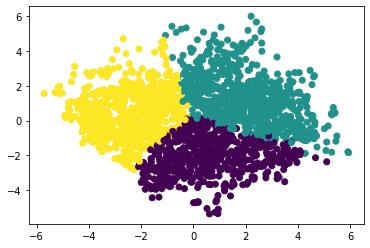

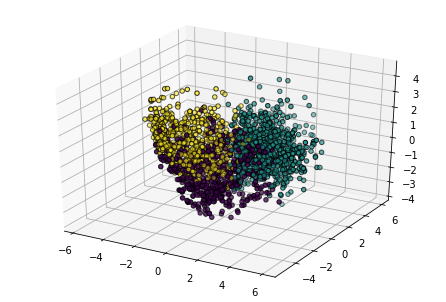

In [58]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)

kmeans=cluster.fit(Z)

score=silhouette_score(X,kmeans.labels_,metric='euclidean')
print('Silhouetter Score: %.3f'%score)

plt.scatter(Z[:, 0], Z[:, 1],c=kmeans.labels_)
fig = plt.figure() 
ax = Axes3D(fig)
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=kmeans.labels_, edgecolor='k')
fig.show()

In [59]:
np.unique(Y, return_counts=True)

(array([1, 2, 3]), array([1655,  295,  176]))

In [60]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)
kmeans=cluster.fit(Z)
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([602, 770, 754]))

In [61]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)    #Περίπου ίδια ακρίβεια με λιγότερες συνιστώσες
kmeans=cluster.fit(Z)

kmeans.labels_[np.where(kmeans.labels_==2)]=4  #1
kmeans.labels_[np.where(kmeans.labels_==0)]=5  #2  
kmeans.labels_[np.where(kmeans.labels_==1)]=6  #3

kmeans.labels_[np.where(kmeans.labels_==4)]=1
kmeans.labels_[np.where(kmeans.labels_==5)]=2
kmeans.labels_[np.where(kmeans.labels_==6)]=3
labels=kmeans.labels_
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))

Prediction accuracy for the testing dataset is:  25.7 %
Prediction balanced accuracy for the testing dataset is:  23.8 %
--------------- Confusion Matrix ---------------
[[463 519 673]
 [244  19  32]
 [ 47  64  65]]


In [62]:
Z=X[:,0:2]

Silhouetter Score: 0.177


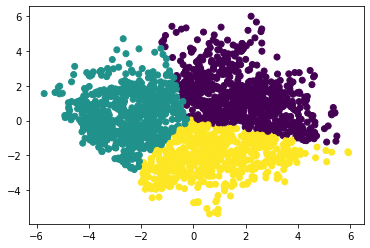

In [63]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)

kmeans=cluster.fit(Z)

score=silhouette_score(X,kmeans.labels_,metric='euclidean')
print('Silhouetter Score: %.3f'%score)

plt.scatter(Z[:, 0], Z[:, 1],c=kmeans.labels_)

In [64]:
np.unique(Y, return_counts=True)

(array([1, 2, 3]), array([1655,  295,  176]))

In [65]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)
kmeans=cluster.fit(Z)
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([757, 761, 608]))

In [66]:
cluster=KMeans(n_clusters=3,random_state=20,n_init=20)    #Εδώ βλέπουμε να μειώνεται σε μεγάλο βαθμό η απόδοση του αλγορίθμου γεγονός που δεχίνει πως η τρίτη συνιστώσα('2') έχει αρκετή πληροφορία για την κλάση NSP
kmeans=cluster.fit(Z)

kmeans.labels_[np.where(kmeans.labels_==2)]=4  #1
kmeans.labels_[np.where(kmeans.labels_==0)]=5  #2  
kmeans.labels_[np.where(kmeans.labels_==1)]=6  #3

kmeans.labels_[np.where(kmeans.labels_==4)]=1
kmeans.labels_[np.where(kmeans.labels_==5)]=2
kmeans.labels_[np.where(kmeans.labels_==6)]=3
labels=kmeans.labels_
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------") #65.5% ακρίβεια με 10 συνιστώσες ενώ με 3 64.6% επομένως δεν αξίζει να χαλάσουμε τόση ταχύτητα για 0.8% επιπλέον ακρίβεια
print(confusion_matrix(Y,labels))                         #Τελικό συμπέρασμα οι πρώτες 3 συνιστώσες έχουν την περισσότερη πληροφορία και δίνουν την καλύτερη απόδοση για την πρόβλεψη της κλάσης NSP

Prediction accuracy for the testing dataset is:  28.0 %
Prediction balanced accuracy for the testing dataset is:  23.1 %
--------------- Confusion Matrix ---------------
[[515 668 472]
 [ 19  34 242]
 [ 74  55  47]]
